<H3>Load Libraries</H3>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import random
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from scipy.misc import imread, imsave, imresize, imshow

%matplotlib inline

from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.models import model_from_json

Using Theano backend.


<H3>Load the saved model and weights</H3>

In [2]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.load_weights("model_weights.h5")

<H3>Defining a function to process test images</H3>

In [3]:
def predict_test(test_file, model):
    class_info = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
        
    image_data = imread(test_file)
    image_resized = imresize(image_data, (32, 32))
    image_arr = np.asarray (image_resized.transpose(2,0,1), dtype = 'float32')
    dataset = np.ndarray((1, 3, 32, 32), dtype = np.float32)
    dataset [0, :, :, :] = image_arr
    dataset /= 255
    pred_pr = model.predict_proba(dataset, verbose = 0)
    pred_cl = model.predict_classes(dataset, verbose = 0)[0]
   
    print 'Predicted Class:', class_info[pred_cl]
    print 'Predicted Probabilities:'
    for i in xrange(0,10):
        print class_info[i],':', pred_pr[0][i]

<H3>Predicting the classes of test images</H3>

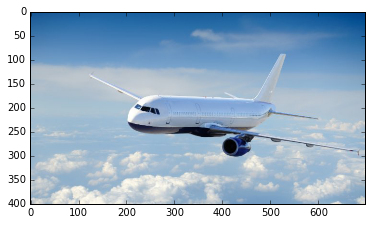

In [4]:
test_image = imread('test_images/airplane.jpg')
plt.imshow(test_image)

In [5]:
predict_test('test_images/airplane.jpg', model)

Predicted Class: airplane
Predicted Probabilities:
airplane : 0.718062162399
automobile : 0.00406171986833
bird : 0.14257659018
cat : 0.00871632620692
deer : 0.0303694829345
dog : 0.00172794389073
frog : 0.0187250040472
horse : 0.00181290949695
ship : 0.0725788027048
truck : 0.00136905559339


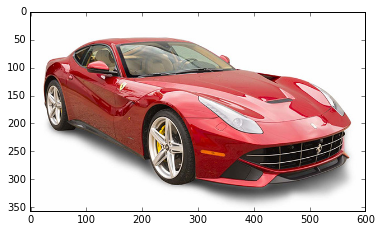

In [6]:
test_image = imread('test_images/automobile.jpg')
plt.imshow(test_image)

In [7]:
predict_test('test_images/automobile.jpg', model)

Predicted Class: automobile
Predicted Probabilities:
airplane : 1.69334455791e-07
automobile : 0.999924302101
bird : 1.68639449072e-08
cat : 6.60760390847e-10
deer : 1.50684031919e-09
dog : 2.43371611752e-09
frog : 7.77817206199e-08
horse : 1.2233637714e-10
ship : 1.29607406052e-06
truck : 7.41212061257e-05


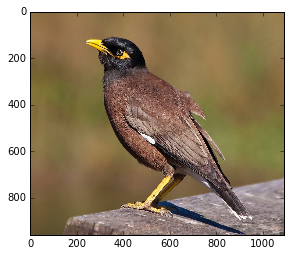

In [8]:
test_image = imread('test_images/bird.jpg')
plt.imshow(test_image)

In [9]:
predict_test('test_images/bird.jpg', model)

Predicted Class: bird
Predicted Probabilities:
airplane : 0.00109157408588
automobile : 1.4196552911e-06
bird : 0.944907486439
cat : 0.00889414176345
deer : 0.0221025887877
dog : 0.00801135227084
frog : 0.0127195464447
horse : 0.00203889212571
ship : 0.000218886736548
truck : 1.4091147932e-05


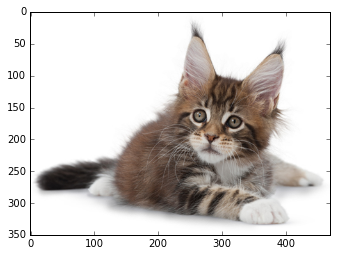

In [10]:
test_image = imread('test_images/cat.jpg')
plt.imshow(test_image)

In [11]:
predict_test('test_images/cat.jpg', model)

Predicted Class: cat
Predicted Probabilities:
airplane : 0.0119029469788
automobile : 0.00135478097945
bird : 0.244065225124
cat : 0.318059623241
deer : 0.0698361173272
dog : 0.269698113203
frog : 0.0321083031595
horse : 0.0364425964653
ship : 0.00306702149101
truck : 0.0134652694687


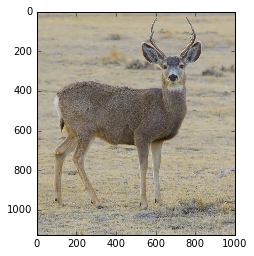

In [12]:
test_image = imread('test_images/deer.jpg')
plt.imshow(test_image)

In [13]:
predict_test('test_images/deer.jpg', model)

Predicted Class: deer
Predicted Probabilities:
airplane : 1.43059469337e-05
automobile : 2.57639442225e-07
bird : 0.0168419685215
cat : 0.000455960544059
deer : 0.973383545876
dog : 0.00107843347359
frog : 0.000326615234371
horse : 0.00789680052549
ship : 1.30473256377e-06
truck : 8.0300259242e-07


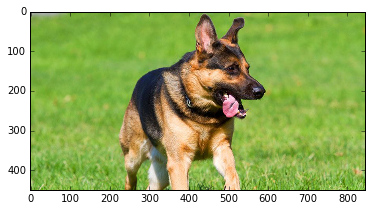

In [14]:
test_image = imread('test_images/dog.jpg')
plt.imshow(test_image)

In [15]:
predict_test('test_images/dog.jpg', model)

Predicted Class: dog
Predicted Probabilities:
airplane : 0.000204127340112
automobile : 6.64528306515e-06
bird : 0.382544279099
cat : 0.0181338135153
deer : 0.114172481
dog : 0.420043349266
frog : 0.00503708887845
horse : 0.0598064288497
ship : 3.60741250915e-05
truck : 1.56855749083e-05


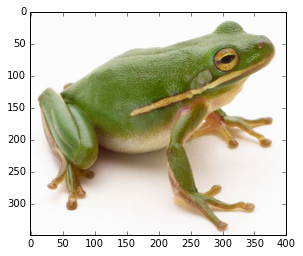

In [16]:
test_image = imread('test_images/frog.jpg')
plt.imshow(test_image)

In [17]:
predict_test('test_images/frog.jpg', model)

Predicted Class: frog
Predicted Probabilities:
airplane : 0.0132923517376
automobile : 0.000266428745817
bird : 0.00892124604434
cat : 0.0176182389259
deer : 0.0819873809814
dog : 0.00348584586754
frog : 0.867963850498
horse : 0.00293408334255
ship : 0.000994279631414
truck : 0.00253628613427


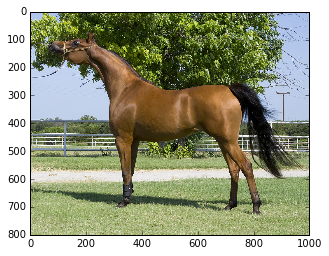

In [18]:
test_image = imread('test_images/horse.jpg')
plt.imshow(test_image)

In [19]:
predict_test('test_images/horse.jpg', model)

Predicted Class: horse
Predicted Probabilities:
airplane : 7.95882382221e-09
automobile : 4.48510933254e-12
bird : 1.26330030525e-06
cat : 1.22396258462e-07
deer : 0.00124177883845
dog : 3.55469819624e-05
frog : 1.19188570125e-09
horse : 0.998721301556
ship : 6.1036328769e-11
truck : 2.31250241178e-10


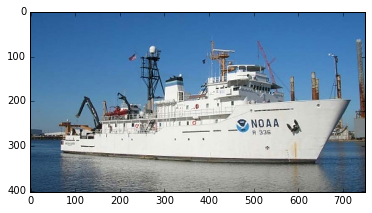

In [20]:
test_image = imread('test_images/ship.jpg')
plt.imshow(test_image)

In [21]:
predict_test('test_images/ship.jpg', model)

Predicted Class: ship
Predicted Probabilities:
airplane : 0.000282745866571
automobile : 8.46015041134e-07
bird : 3.48930802829e-06
cat : 6.96194138072e-06
deer : 3.08936932925e-06
dog : 1.75368867872e-07
frog : 2.61089866171e-07
horse : 2.03878741445e-07
ship : 0.999689400196
truck : 1.28132032842e-05


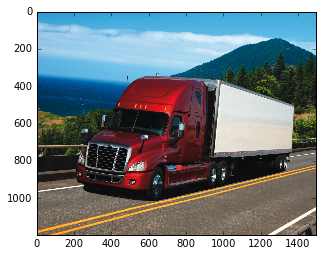

In [22]:
test_image = imread('test_images/truck.jpg')
plt.imshow(test_image)

In [23]:
predict_test('test_images/truck.jpg', model)

Predicted Class: truck
Predicted Probabilities:
airplane : 0.000271070777671
automobile : 0.0047839130275
bird : 5.8916434682e-06
cat : 2.64937316388e-05
deer : 5.25834821019e-06
dog : 5.3806033975e-06
frog : 3.55881797987e-06
horse : 1.71638112079e-05
ship : 0.000155973437359
truck : 0.994725286961
